**Youtube Comments Sentiment Analysis**

First of all thank you @gsc ankith for upload this dataset. Here I have tried to perform a very simple sentiment analysis using AFINN library

In [1]:
#installing contractions library
!pip install contractions

In [2]:
#Generic Data Processing & Visualization Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re,string,unicodedata
import contractions #import contractions_dict
%matplotlib inline

In [42]:
#Importing text processing libraries
import spacy
import spacy.cli
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

#downloading wordnet/punkt dictionary
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\best\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#Installing & Importing Sentiment Analysis Library  - AFINN
!pip install afinn
from afinn import Afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=43b658815078f4f148f37bb53dc7a861ac222e76c12b737d9e8c68b480af0623
  Stored in directory: c:\users\best\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [5]:
data = pd.read_csv("C:/Users/best/Downloads/youtube.csv")

**Data Exploration**

In [6]:
data.shape

(527, 2)

In [7]:
#checking for null/missing values
data.isna().sum()

Comments    1
label       0
dtype: int64

In [8]:
#dropping the index with missing comments
data = data.dropna()
data.shape

(526, 2)

In [9]:
#creating a new column in the dataset for word count
data ['word_count'] = data['Comments'].apply(lambda x:len(str(x).split(" ")))

In [10]:
data.head()

,Comments,label,word_count
0,How to stop the war Stop the media escalating it,1,10
1,WW1 : History Books WW2 : History Books WW3 : ...,1,12
2,Let the politicians go to war and soldiers tak...,1,12
3,We'll be praying for the peace of everyone.......,1,9
4,We are praying that this won't go too far. Ble...,1,14


In [11]:
#taking a copy of the clean dataset
data_clean = data.copy()

**Data Preperation**

In [12]:
#lowering cases
data_clean['Comments'] = data_clean['Comments'].str.lower()

In [13]:
#stripping leading spaces (if any)
data_clean['Comments'] = data_clean['Comments'].str.strip()

In [14]:
#removing punctuations
from string import punctuation

def remove_punct(text):
  for punctuations in punctuation:
    text = text.replace(punctuations, '')
  return text

#apply to the dataset
data_clean['Comments'] = data_clean['Comments'].apply(remove_punct)

In [15]:
#function to remove special characters
def remove_special_chars(text, remove_digits=True):
  pattern = r'[^a-zA-z0-9\s]'
  text = re.sub(pattern, '', text)
  return text

#applying the function on the clean dataset
data_clean['Comments'] = data_clean['Comments'].apply(remove_special_chars)

In [16]:
#function to remove macrons & accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#applying the function on the clean dataset
data_clean['Comments'] = data_clean['Comments'].apply(remove_accented_chars)  

In [17]:
#Function to expand contractions
def expand_contractions(con_text):
  con_text = contractions.fix(con_text)
  return con_text

#applying the function on the clean dataset
data_clean['Comments'] = data_clean['Comments'].apply(expand_contractions)  

In [18]:
data_clean.head()

,Comments,label,word_count
0,how to stop the war stop the media escalating it,1,10
1,ww1 history books ww2 history books ww3 you...,1,12
2,let the politicians go to war and soldiers tak...,1,12
3,well be praying for the peace of everyonefrom ...,1,9
4,we are praying that this will not go too far b...,1,14


In [19]:
#back up of the prepared data
data_clean_bckup = data_clean.copy()

**Text Processing/Normalization - Removing Stop Words**

In [20]:
stopword_list = set(stopwords.words('english'))

In [21]:
tokenizer = ToktokTokenizer()

In [22]:
#function to remove stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#applying the function
data_clean['Comments_Clean'] = data_clean['Comments'].apply(remove_stopwords)      

**Text Processing/Normalization - Stemming**

applying the most simplest stemmer i.e. PorterStemmer

In [23]:
#Function for stemming
def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

#applying the function
data_clean['Normalized_Comments'] = data_clean['Comments_Clean'].apply(simple_stemmer)


In [24]:
#dropping unwanted columns
data_clean = data_clean.drop(columns=data_clean[['Comments_Clean']],axis=1)
data_clean.head()

,Comments,label,word_count,Normalized_Comments
0,how to stop the war stop the media escalating it,1,10,stop war stop media escal
1,ww1 history books ww2 history books ww3 you...,1,12,ww1 histori book ww2 histori book ww3 youtub s...
2,let the politicians go to war and soldiers tak...,1,12,let politician go war soldier take rest time
3,well be praying for the peace of everyonefrom ...,1,9,well pray peac everyonefrom philippin
4,we are praying that this will not go too far b...,1,14,pray go far bless everyon hungari


In [25]:
#rearranging columns
data_clean = data_clean[['Comments','Normalized_Comments','word_count','label']]

#taking backup 
data_clean_bckup_norm = data_clean.copy()

data_clean.head()

,Comments,Normalized_Comments,word_count,label
0,how to stop the war stop the media escalating it,stop war stop media escal,10,1
1,ww1 history books ww2 history books ww3 you...,ww1 histori book ww2 histori book ww3 youtub s...,12,1
2,let the politicians go to war and soldiers tak...,let politician go war soldier take rest time,12,1
3,well be praying for the peace of everyonefrom ...,well pray peac everyonefrom philippin,9,1
4,we are praying that this will not go too far b...,pray go far bless everyon hungari,14,1


In [32]:
def afinn_sent_category(score):
    categories = ['positive','negative']
    if score == 0:
        return categories[0]
    elif score == 1:
        return categories[1]
       

data_clean['category'] = [afinn_sent_category(scr) for scr in data_clean['label']]

**Visualisation**

In [33]:
data_clean.head()

,Comments,Normalized_Comments,word_count,label,category
0,how to stop the war stop the media escalating it,stop war stop media escal,10,1,negative
1,ww1 history books ww2 history books ww3 you...,ww1 histori book ww2 histori book ww3 youtub s...,12,1,negative
2,let the politicians go to war and soldiers tak...,let politician go war soldier take rest time,12,1,negative
3,well be praying for the peace of everyonefrom ...,well pray peac everyonefrom philippin,9,1,negative
4,we are praying that this will not go too far b...,pray go far bless everyon hungari,14,1,negative


Text(0.5, 0, 'Sentiment Category')

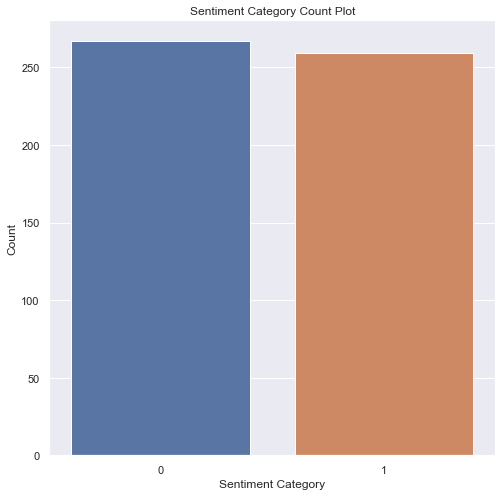

In [34]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(x="label", data=data_clean)
plt.title('Sentiment Category Count Plot')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')

#ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
#i=0
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2., height + 1,
#        data_clean['afinn_sent_category'].value_counts()[i],ha="center")
#    i += 1

<AxesSubplot:xlabel='label', ylabel='word_count'>

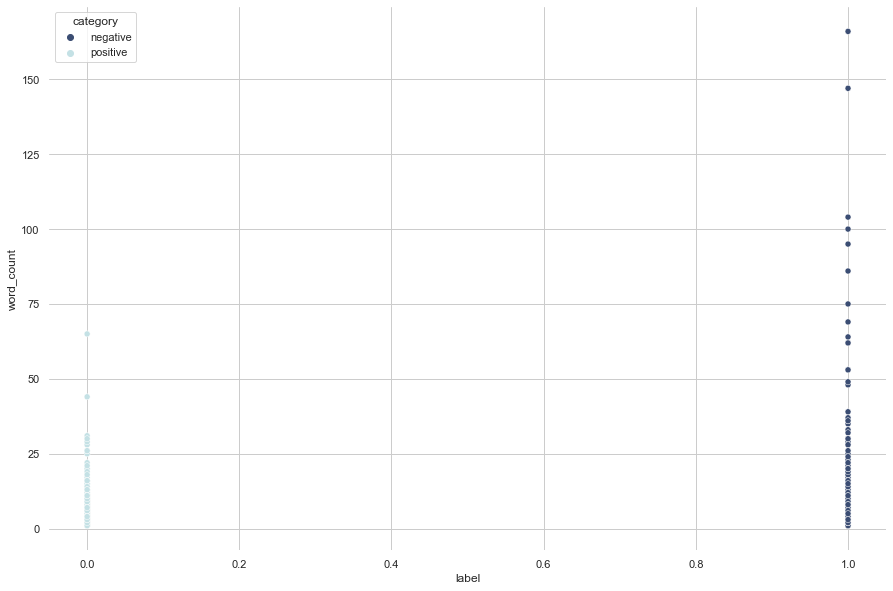

In [35]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="label", y="word_count", 
                hue="category", 
                palette="ch:r=-.2,d=.3_r", 
                sizes=(1,8), 
                data=data_clean, ax=ax)

In [38]:


token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data_clean['Normalized_Comments'])
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data_clean['Normalized_Comments'])

In [39]:
x=text_tf
y=data_clean['label']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=1)

In [40]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
preddt = nb.predict(x_test)
print("Confusion Matrix :")
print(confusion_matrix(y_test,preddt))

Confusion Matrix :
[[29  0]
 [ 4 20]]


In [43]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        29
           1       1.00      0.83      0.91        24

    accuracy                           0.92        53
   macro avg       0.94      0.92      0.92        53
weighted avg       0.93      0.92      0.92        53



In [44]:
sv = svm.SVC()
sv.fit(x_train,y_train)
preddt = sv.predict(x_test)
print("Confusion Matrix ")
print(confusion_matrix(y_test,preddt))

Confusion Matrix 
[[21  8]
 [ 0 24]]


In [45]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        29
           1       0.75      1.00      0.86        24

    accuracy                           0.85        53
   macro avg       0.88      0.86      0.85        53
weighted avg       0.89      0.85      0.85        53



In [46]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix ")
print(confusion_matrix(y_test,preddt))

Confusion Matrix 
[[29  0]
 [10 14]]


In [47]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        29
           1       1.00      0.58      0.74        24

    accuracy                           0.81        53
   macro avg       0.87      0.79      0.79        53
weighted avg       0.86      0.81      0.80        53



In [48]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preddt = lr.predict(x_test)
print("Confusion Matrix ")
print(confusion_matrix(y_test,preddt))

Confusion Matrix 
[[16 13]
 [ 1 23]]


In [49]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        29
           1       0.64      0.96      0.77        24

    accuracy                           0.74        53
   macro avg       0.79      0.76      0.73        53
weighted avg       0.80      0.74      0.73        53

